<a href="https://colab.research.google.com/github/Muhallab2/E-learning-App/blob/main/Assignment_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [4]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Football VS Rugby/Train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Football VS Rugby/Test'    # Update with your actual path

In [5]:
import os
print(len(os.listdir('/content/drive/MyDrive/Football VS Rugby/Train/Football')))
print(len(os.listdir('/content/drive/MyDrive/Football VS Rugby/Train/Rugby')))
print(len(os.listdir('/content/drive/MyDrive/Football VS Rugby/Test/Football')))
print(len(os.listdir('/content/drive/MyDrive/Football VS Rugby/Test/Rugby')))

1224
1224
305
305


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1960 images belonging to 2 classes.
Found 488 images belonging to 2 classes.


In [8]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [9]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [11]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 888s 14s/step - accuracy: 0.5550 - loss: 0.8930 - val_accuracy: 0.6865 - val_loss: 0.6334
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 359s 6s/step - accuracy: 0.6899 - loss: 0.5781 - val_accuracy: 0.6086 - val_loss: 0.6467
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 386s 6s/step - accuracy: 0.7083 - loss: 0.5629 - val_accuracy: 0.7254 - val_loss: 0.5712
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 411s 6s/step - accuracy: 0.8278 - loss: 0.3893 - val_accuracy: 0.6598 - val_loss: 0.7305
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 386s 6s/step - accuracy: 0.8941 - loss: 0.2576 - val_accuracy: 0.6803 - val_loss: 0.9426
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 369s 6s/step - accuracy: 0.9453 - loss: 0.1588 - val_accuracy: 0.6619 - val_loss: 0.8452
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 382s 6s/step - accuracy: 0.9611 - loss: 0.1267 - val_accuracy: 0.6803 - val_loss: 1.5781
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 364s 6s/step - accuracy: 0.9801 - loss: 0.0657 - val_accuracy: 0.6783 - 

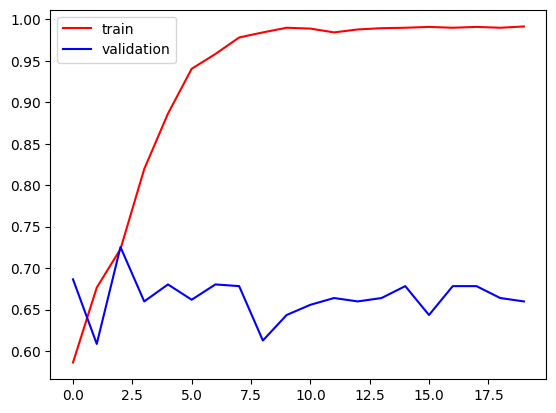

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

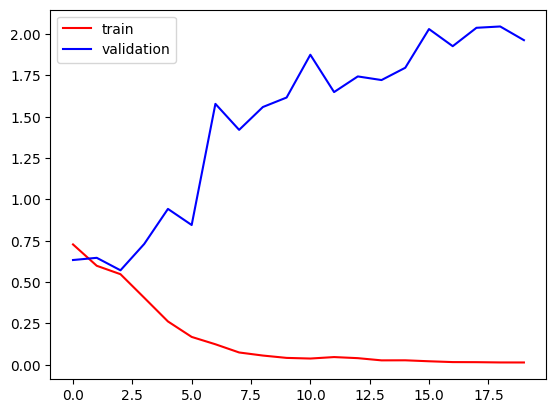

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 610 images belonging to 2 classes.


In [15]:
#predict the test data
predictions = model.predict(test_data)


20/20 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[174 131]
 [173 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53       305
           1       0.50      0.43      0.46       305

    accuracy                           0.50       610
   macro avg       0.50      0.50      0.50       610
weighted avg       0.50      0.50      0.50       610



In [17]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 541s 9s/step - accuracy: 0.5843 - loss: 4.2432 - val_accuracy: 0.5000 - val_loss: 6.1787
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 535s 9s/step - accuracy: 0.6380 - loss: 2.1688 - val_accuracy: 0.5389 - val_loss: 2.7374
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 543s 9s/step - accuracy: 0.6404 - loss: 1.0971 - val_accuracy: 0.5061 - val_loss: 5.3605
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 531s 9s/step - accuracy: 0.7205 - loss: 0.6449 - val_accuracy: 0.5717 - val_loss: 1.0474
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 520s 8s/step - accuracy: 0.7216 - loss: 0.6033 - val_accuracy: 0.4877 - val_loss: 1.0820
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 530s 9s/step - accuracy: 0.7750 - loss: 0.5308 - val_accuracy: 0.5553 - val_loss: 0.9081
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 564s 9s/step - accuracy: 0.7858 - loss: 0.4896 - val_accuracy: 0.5922 - val_loss: 0.8930
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 518s 8s/step - accuracy: 0.8464 - loss: 0.3636 - val_accuracy: 0.5553 - v

In [20]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 610 images belonging to 2 classes.


In [21]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[124 181]
 [121 184]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.51      0.41      0.45       305
           1       0.50      0.60      0.55       305

    accuracy                           0.50       610
   macro avg       0.51      0.50      0.50       610
weighted avg       0.51      0.50      0.50       610



In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 708s 11s/step - accuracy: 0.5887 - loss: 1.2065 - val_accuracy: 0.5697 - val_loss: 0.9465
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 693s 11s/step - accuracy: 0.6221 - loss: 0.8063 - val_accuracy: 0.6803 - val_loss: 0.6084
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 740s 11s/step - accuracy: 0.6805 - loss: 0.6360 - val_accuracy: 0.6598 - val_loss: 0.6677
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 696s 11s/step - accuracy: 0.7227 - loss: 0.5691 - val_accuracy: 0.6496 - val_loss: 0.6917
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 739s 11s/step - accuracy: 0.6965 - loss: 0.5748 - val_accuracy: 0.6270 - val_loss: 0.6900
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 745s 11s/step - accuracy: 0.7198 - loss: 0.5421 - val_accuracy: 0.5902 - val_loss: 0.8433
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 696s 11s/step - accuracy: 0.6857 - loss: 0.6391 - val_accuracy: 0.5348 - val_loss: 0.9371
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 694s 11s/step - accuracy: 0.6837 - loss: 0.6280 - val_accuracy: 0.